## JSF Online Tutorial

We cannot install JSF natively here, so we simply use a modified JSF implementation that runs on the console. This is a simple tutorial to get you started with JSF. We will be using JSF to simulate the Predator-Prey model described previously.

First, import the necessary libraries.

In [10]:
import sys
sys.path.append('./src/')
import JSF_Solver as jsf
# from jsf import jsf

import pandas as pd
import random
import matplotlib.pyplot as plt

Here, `pandas` is used to store the simulation results, `random` is used to set the seed for reproducibility, `matplotlib` is used to plot the results, and `jsf` is the package we are using to simulate the process.

Next, we define the initial condition of the predator-prey model and the model parameters. The predator-prey model has two compartments, so we define the initial condition as a list of length two:

In [11]:
x0 = [50, 10]

This initalises the model with `50` prey and `10` predators.

Next, the model parameters are the reproduction rate of the prey, `mA`, the predation rate, `mB`, the death rate of the predators, `mC`:

In [12]:
mA = 2.00
mB = 0.05
mC = 1.50

We then define the `rates` of the model:

In [13]:
rates = lambda x, t: [mA * x[0],
                      mC * x[1],
                      mB * x[0] * x[1]]

and the stoichiometric matrices of the model:

In [14]:
reactant_matrix = [[1 , 0],
                   [0 , 1],
                   [1 , 1]]

product_matrix = [[2 , 0],
                  [0 , 0],
                  [0 , 2]]

We define the maximum time of the simulation:

In [15]:
t_max = 10

There is a little bit of configuration needed to tell JSF how to actually run the simulation. Namely, we use the stoichiometric matrices to define the stoichiometry of the process. `DoDisc` is a boolean list, and describes which compartments are initially represented as a stochastic processes.



In [16]:
stoich = {
         "nu": [ [a - b for a, b in zip(r1, r2)]
                for r1, r2 in zip(product_matrix, reactant_matrix) ],
         "DoDisc": [1, 1],
         "nuReactant": reactant_matrix,
         "nuProduct": product_matrix,
         }

Now all we need to set are the options for the simulation. We set the time step, `dt` to be `0.01` and the threshold for switching, `SwitchingThreshold`, to be `30` for both compartments. `EnforceDo` is a boolean list and describes which compartments are permitted to dynamically change between discrete and continuous regimes. If an entry of `EnforceDo` is `0`, then that compartment is allowed to switch between discrete and continuous regimes. If an entry of `EnforceDo` is `1`, then that compartment is not allowed to switch, and will remain in the regime it was initialised in.

In [17]:
my_opts = {
            "EnforceDo": [0, 0],
            "dt": 0.01,
            "SwitchingThreshold": [30, 30]
           }

We are now able to call `jsf.jsf` to simulate the process using the “operator splitting” method.



In [20]:
sim = jsf.JumpSwitchFlowSimulator(x0, rates, stoich, t_max, my_opts)
# xs, ts = jsf.JumpSwitchFlowSimulator(
#                 x0,
#                 lambda x, time: self._rates(x, theta, time),
#                 self._stoich,
#                 dt,
#                 _my_opts
#             )

Finally, we can plot the results of the simulation. We’ll use a combination of pandas and matplotlib to do this, but the output of jsf is a pandas DataFrame of numbers so it’s easy to use whichever plotting library you prefer.



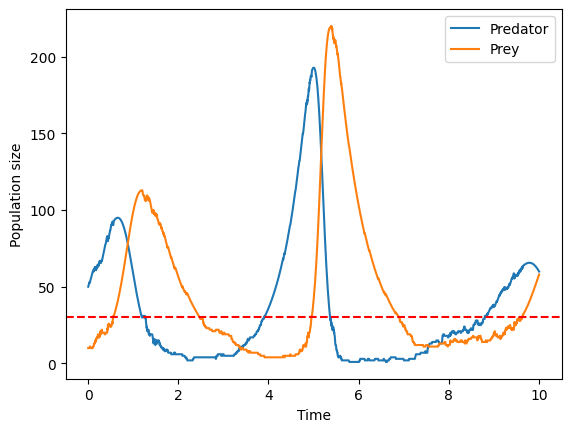

In [21]:
plt.plot(sim[1], sim[0][0], label="Predator")
plt.plot(sim[1], sim[0][1], label="Prey")
plt.axhline(y=my_opts["SwitchingThreshold"][1], color="r", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Population size")
plt.legend()
plt.show()